# Mapping out the present state of the game

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import puzz
import copy

## TODO

some way to specify that obstacle o2 comes after o1? (moon comes after asphyxiation maze?)
this is room-like behavior for nodes.

identify which abilities should be placed next based on what is required?
is there a sense of 'minimum required'? like, i know i could place ultimate deathtrap if only
invulnerability was in the game, but i'm not ready to put invulnerability yet

the requirements of the thing is everything it requires and all the things those things require
n/100 requirements met by existing network calculation?

allow a way to "force" place node and then store info on how the current net is invalid
and what needs to be placed in order to make network valid

allow a way for obstacles to "block" abilities at all points after them? must be 

suggest possible joint obstacles (complicated) :
1. locked(?) obstacles with a joint requirement that is met by signature set
2. unplaced obstacles with joint requirements that can be divided up between the 
    len(obstacle req) ≥ (ability req)
    obstacle reqs not yet placed
    each ability req can have at least one obstacle req in its future
    (this logic is a little prickly so maybe i'll only implement it if i find it necessary later)

In [2]:
net = puzz.Network(['normal', 'death exploit'])

### planned nodes

In [3]:
# current obstacles
net.add_obstacle('cave1')
net.add_obstacle('arrow trap')
net.add_obstacle('knight')
net.add_obstacle('volcano')
net.add_obstacle('fireman')
net.add_obstacle('farmer store')
net.add_obstacle('eggplant commercial')
net.add_obstacle('first commercial')

# planned obstacles
net.add_obstacle('locked door')
net.add_obstacle('fast-moving target')
net.add_obstacle('ethereal damage')
net.add_obstacle('asphyxiation maze')
net.add_obstacle('pit')
net.add_obstacle('cliff')
net.add_obstacle('small monsters')
net.add_obstacle('binary tree of death')
net.add_obstacle('large magnet')
net.add_obstacle('fixed obstacle')
net.add_obstacle('fixed non-destructible obstacle')
net.add_obstacle('heavy obstacle')
net.add_obstacle('large damage')
net.add_obstacle('moon')
net.add_obstacle('kill ethereal monster')
net.add_obstacle('kill vampire')
net.add_obstacle('dungeon')
net.add_obstacle('hell')

# current abilities
net.add_ability('strength')
net.add_ability('fireproof')
net.add_ability('armor')
net.add_ability('money')
net.add_ability('eggplant')
net.add_ability('duplicator')
net.add_ability('hypnosis')
net.add_ability('fireproof')

# planned abilities
net.add_ability('ethereal')
net.add_ability('damage ethereal')
net.add_ability('invulnerable')
# net.add_ability('invisible')
net.add_ability('telepathy')
net.add_ability('nullify')
net.add_ability('elective vomit')
net.add_ability('eat all')
net.add_ability('spaceflight')
net.add_ability('reanimate dead')
net.add_ability('vampirism')
net.add_ability('teleporter')
# net.add_ability('kick')

In [4]:
net.defeats(('invulnerable', 'damage ethereal'), 'hell')

net.defeats(('invulnerable', 'damage ethereal'), 'kill vampire')

net.defeats('telepathy', 'binary tree of death')

net.defeats(('elective vomit', 'eat all'), 'dungeon')

net.defeats('normal', 'fireman')

net.defeats('death exploit', 'cave1')

net.defeats('armor', 'arrow trap')

net.defeats('fireproof', 'volcano')

net.defeats('strength', 'knight')
net.defeats('strength', 'heavy obstacle')

net.defeats('normal', 'first commercial')
net.defeats('money', 'farmer store')
net.defeats('eggplant', 'eggplant commercial')

net.defeats(('teleporter', 'death exploit'), 'asphyxiation maze')
net.defeats('teleporter', 'asphyxiation maze')
net.defeats('teleporter', 'dungeon')

net.defeats('vampirism', 'asphyxiation maze')
net.defeats('vampirism', 'cliff')

net.defeats('spaceflight', 'moon')

net.defeats('nullify', 'locked door')
net.defeats('nullify', 'fast-moving target')
net.defeats('nullify', 'knight')
net.defeats('nullify', 'heavy obstacle')
net.defeats('nullify', 'fixed obstacle')
net.defeats('nullify', 'large magnet')

net.defeats('telepathy', 'binary tree of death')

# net.defeats('invisible', 'knight')
# net.defeats('invisible', 'small monsters')

net.defeats('damage ethereal', 'fireman')
net.defeats('damage ethereal', 'knight')
net.defeats('damage ethereal', 'small monsters')
net.defeats('damage ethereal', 'kill ethereal monster')

net.defeats('ethereal', 'locked door')
net.defeats('ethereal', 'large damage')
net.defeats('ethereal', 'heavy obstacle')
net.defeats('ethereal', 'knight')
net.defeats('ethereal', 'fixed obstacle')
net.defeats('ethereal', 'fixed non-destructible obstacle')
net.defeats('ethereal', 'small monsters')
net.defeats('ethereal', 'volcano')
net.defeats('ethereal', 'arrow trap')

net.defeats('hypnosis', 'knight')
net.defeats('hypnosis', 'fireman')
net.defeats('hypnosis', 'knight')
net.defeats('hypnosis', 'farmer store')

net.defeats('invulnerable', 'knight')
net.defeats('invulnerable', 'large damage')
net.defeats('invulnerable', 'small monsters')
net.defeats('invulnerable', 'ethereal damage')
net.defeats('invulnerable', 'volcano')
net.defeats('invulnerable', 'arrow trap')

In [5]:
# hypnosis eclipses vampirism
net.nodes['hypnosis'].reqs.add('vampirism')

# teleporter eclipses normal dungeon method
net.nodes['teleporter'].reqs.add('dungeon')

### the current layout of the game

In [6]:
net.add_connection('start', 'fireman')
net.add_connection('fireman', 'fireproof')

net.add_connection('start', 'volcano')
net.add_connection('start', 'cave1')
net.add_connection('start', 'first commercial')
net.add_connection('first commercial', 'money')
net.add_connection('start', 'farmer store')

net.add_connection('farmer store', 'eggplant')
net.add_connection('first commercial', 'eggplant commercial')
net.add_connection('eggplant commercial', 'duplicator')

net.add_connection('death exploit', 'cave1')
net.add_connection('cave1', 'strength')
net.add_connection('strength', 'knight')
net.add_connection('knight', 'armor')
net.add_connection('armor', 'arrow trap')

net.add_connection('normal', 'fireman')
net.add_connection('fireproof', 'volcano')

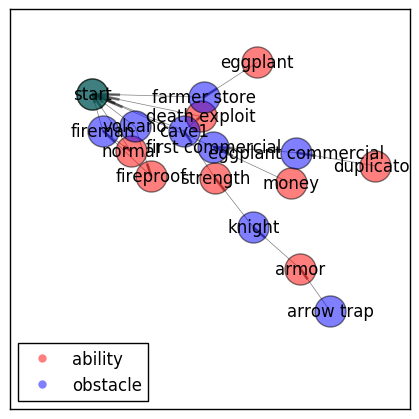

In [7]:
net.plot(spring=True)

In [8]:
# what new nodes would be unlocked if I place this ability in the network?
net.speculate('nullify', after='knight')

{'fast-moving target', 'fixed obstacle', 'large magnet', 'locked door'}

# Let's try building up a new network 

In [9]:
net2 = copy.deepcopy(net)
net2.add_connection('knight', 'heavy obstacle')
net2.add_connection('volcano', 'spaceflight')
net2.add_connection('volcano', 'moon')

In [10]:
net2.analyze()

LOCKED ABILITIES:

teleporter: set(['dungeon'])
invulnerable: set(['armor', 'fireproof'])
hypnosis: set(['money', 'vampirism'])
ethereal: set(['armor', 'strength', 'fireproof'])


LOCKED OBSTACLES:

fixed obstacle: set(['nullify', 'ethereal'])
hell: set([('invulnerable', 'damage ethereal')])
pit: set([])
dungeon: set(['teleporter', ('elective vomit', 'eat all')])
kill ethereal monster: set(['damage ethereal'])
asphyxiation maze: set(['teleporter', 'vampirism', ('teleporter', 'death exploit')])
start: set([])
kill vampire: set([('invulnerable', 'damage ethereal')])
large magnet: set(['nullify'])
fast-moving target: set(['nullify'])
small monsters: set(['invulnerable', 'damage ethereal', 'ethereal'])
cliff: set(['vampirism'])
locked door: set(['nullify', 'ethereal'])
binary tree of death: set(['telepathy'])


PLACE NEXT:

ability reanimate dead can be placed 
anywhere


ability vampirism can be placed 
anywhere
 and would unlock set(['asphyxiation maze', 'cliff'])


ability eat all can b

1. locked(?) obstacles with a joint requirement that is met by signature set
2. unplaced obstacles with joint requirements that can be divided up between the 
    len(obstacle req) ≥ (ability req)
    obstacle reqs not yet placed
    each ability req can have at least one obstacle req in its future
    (this logic is a little prickly so maybe i'll only implement it if i find it necessary later)

PLAN

armor -> cannon behind volcano, cannon -> spaceflight
    just a little exercise of armor and carrying outfit
    to survive the cannon blast to the face ?

dungeon is in mansion

dracula throws you in the dungeon or else you try to
    fight him to death
invulnerable is conferred by dungeon

elective vomit behind the knight
    under heavy gravestone
eat everything behind volcano.
    or let player choose: a perk

nullifier is behind cave2

invuln + damage ethereal : kill dracula : asphyxiation maze on moon as a vampire

OTHER THREADS

fixed non-destructible obstacle
    (third deathtrap?)

teleporter : but not before invulnerability
    because teleporter would allow you to defeat dungeon

    something after you can teleport to dungeon with all abilities

hypnotism

telepathy


Q: why did dungeon req have to be after armor and not knight? knight unlocks armor.

In [11]:
net2.add_connection('arrow trap', 'nullify')

net2.add_connection('armor', 'elective vomit')
net2.add_connection('volcano', 'eat all')
net2.add_connection('armor', 'dungeon')
net2.add_connection('dungeon', 'invulnerable')

net2.add_connection('dungeon', 'ethereal damage')
net2.add_connection('ethereal damage', 'teleporter')
net2.add_connection('moon', 'asphyxiation maze')
net2.add_connection('asphyxiation maze', 'damage ethereal')

net2.add_connection('knight', 'kill vampire')
net2.add_connection('kill vampire', 'vampirism')

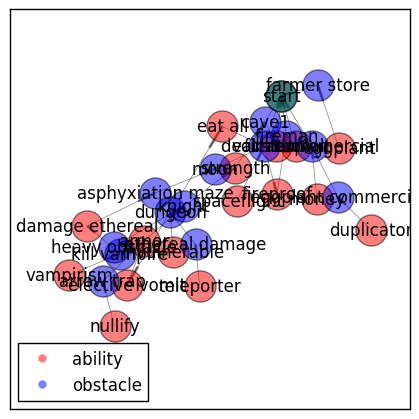

In [14]:
net2.plot()

In [13]:
import networkx as nx
nx.to_agraph(net2.nxgraph())

AttributeError: 'module' object has no attribute 'to_agraph'

In [ ]:
nx.to_agraph()